In [333]:
import pandas as pd
import os
from calendar import month_name
from matplotlib import pyplot as plt
import numpy as np
import math

In [193]:
months = list(month_name)[1:]
df = pd.read_csv('./Sales_Data/Sales_January_2019.csv')
for month in months[1:]:
    temp = pd.read_csv('./Sales_Data/Sales_'+month+'_2019.csv')
    df = pd.concat([df,temp])
df.to_csv('Sales of 1 Year',index=False)
df = pd.read_csv('Sales of 1 Year')
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [194]:
df.shape

(186850, 6)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 10.6+ MB


In [196]:
df =  df.dropna()

In [197]:
df = df[df['Order Date'].str[0:2] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [198]:
df['Month'] = df['Order Date'].apply(lambda x: x[1] if x[0]=='0' else x[0:2])

In [199]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


In [200]:
df['Month'] = df['Month'].astype('int32')

In [211]:
df['Quantity Ordered'] = df['Quantity Ordered'].apply(lambda x: int(x))
df['Price Each'] = df['Price Each'].apply(lambda x: float(x))

Best Month for sale and how much was earned that month

In [201]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


In [202]:
month_grouped = df.groupby(['Month'])

In [203]:
Qty_ord = []
for i in range(1,13):
    Qty_ord.append(month_grouped.get_group(i)['Quantity Ordered'].astype('int32').sum())

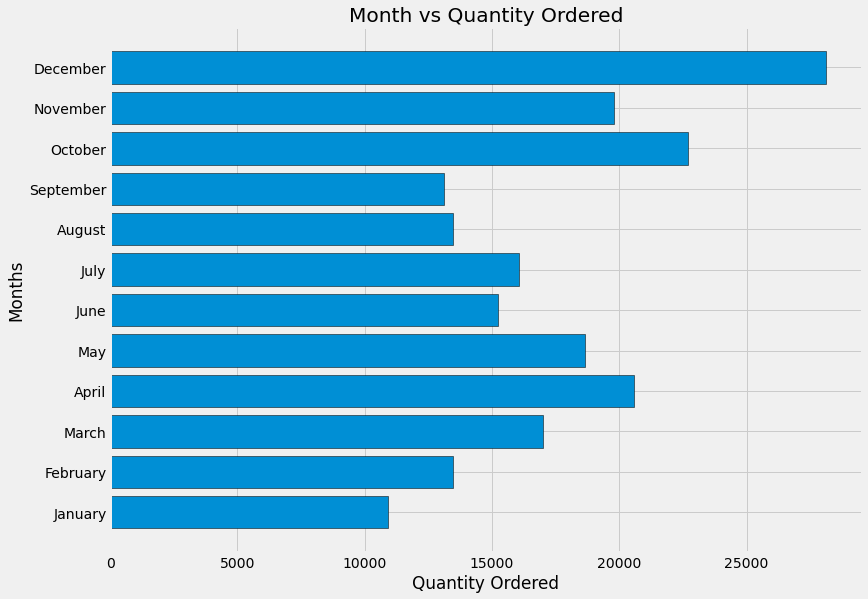

In [334]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,9))
plt.barh(months,Qty_ord,ec='black')
plt.xlabel('Quantity Ordered')
plt.ylabel('Months')
plt.title('Month vs Quantity Ordered')
plt.show()

In [227]:
sales = []
for i in range(1,13):
    mon = month_grouped.get_group(i)
    sales.append(math.ceil(sum(mon['Quantity Ordered']*mon['Price Each'])))
sales

[1822257,
 2202023,
 2807101,
 3390671,
 3152607,
 2577803,
 2647776,
 2244468,
 2097561,
 3736727,
 3199604,
 4613444]

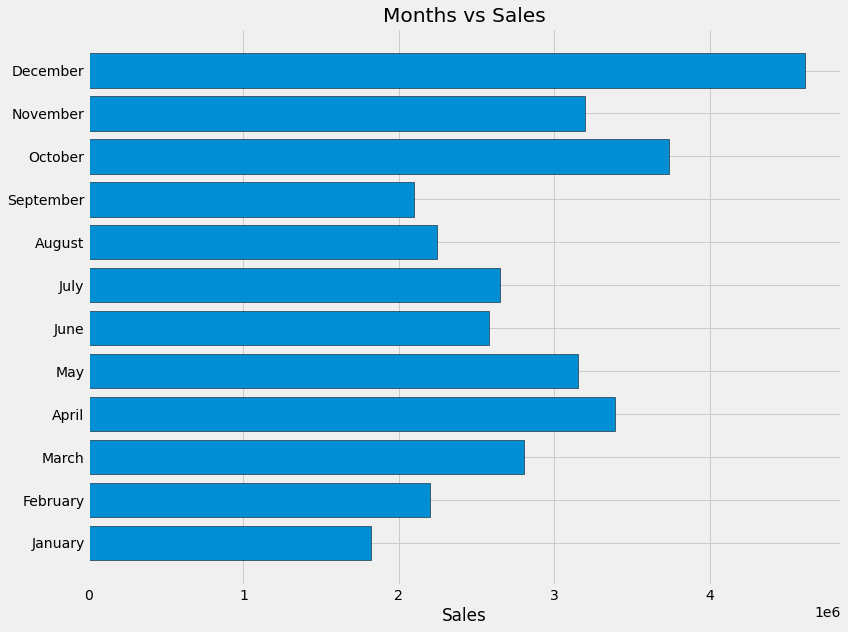

In [315]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,9))
plt.barh(months,sales,ec='black')
plt.xlabel('Sales')
plt.title('Months vs Sales')
plt.tight_layout()
plt.show()

In [236]:
df['Sales'] = df['Price Each']*df['Quantity Ordered']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


Which city has highest number of sales

In [243]:
cities = df['Purchase Address'].str.split(',')
cities = [city[1] for city in cities]
cities

[' Boston',
 ' Portland',
 ' San Francisco',
 ' Los Angeles',
 ' Austin',
 ' San Francisco',
 ' Los Angeles',
 ' San Francisco',
 ' Los Angeles',
 ' San Francisco',
 ' San Francisco',
 ' San Francisco',
 ' Los Angeles',
 ' San Francisco',
 ' Austin',
 ' Portland',
 ' Los Angeles',
 ' Boston',
 ' Los Angeles',
 ' Atlanta',
 ' Seattle',
 ' Los Angeles',
 ' Portland',
 ' San Francisco',
 ' San Francisco',
 ' San Francisco',
 ' San Francisco',
 ' Atlanta',
 ' San Francisco',
 ' Boston',
 ' New York City',
 ' Boston',
 ' Dallas',
 ' Los Angeles',
 ' New York City',
 ' Los Angeles',
 ' San Francisco',
 ' Boston',
 ' New York City',
 ' Boston',
 ' Los Angeles',
 ' Austin',
 ' Austin',
 ' Los Angeles',
 ' Austin',
 ' New York City',
 ' Boston',
 ' Los Angeles',
 ' Atlanta',
 ' New York City',
 ' Seattle',
 ' Los Angeles',
 ' Seattle',
 ' Dallas',
 ' San Francisco',
 ' Los Angeles',
 ' Atlanta',
 ' Los Angeles',
 ' Los Angeles',
 ' Los Angeles',
 ' Los Angeles',
 ' Boston',
 ' San Francisco',
 

In [248]:
df['City'] = cities

In [249]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin


In [252]:
city_group = df.groupby('City')
city_data = city_group.sum()

In [253]:
city_data

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta,16602,2779908.20,104794,2795498.58
Austin,11153,1809873.61,69829,1819581.75
Boston,22528,3637409.77,141112,3661642.01
Dallas,16730,2752627.82,104620,2767975.40
Los Angeles,33289,5421435.23,208325,5452570.80
New York City,27932,4635370.83,175741,4664317.43
Portland,14053,2307747.47,87765,2320490.61
San Francisco,50239,8211461.74,315520,8262203.91
Seattle,16553,2733296.01,104941,2747755.48


No handles with labels found to put in legend.


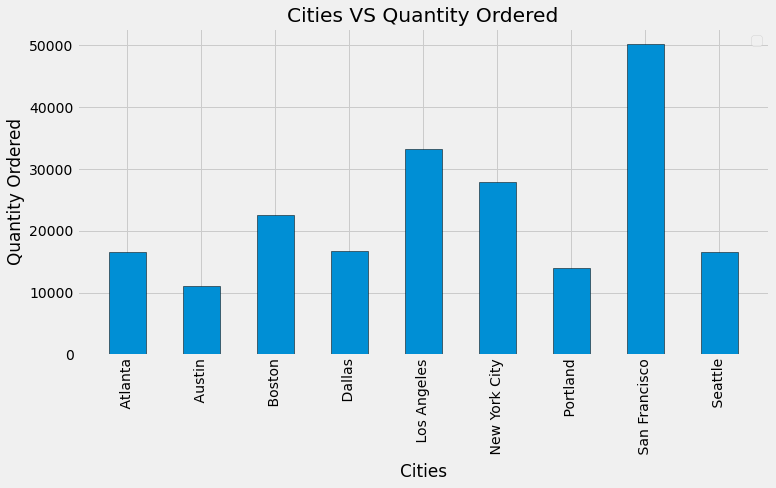

In [444]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(11,7))
plt.bar(list(city_data.index),city_data['Quantity Ordered'],width=0.5,ec='black')
plt.xticks(list(city_data.index),rotation='vertical')
plt.xlabel('Cities')
plt.ylabel('Quantity Ordered')
plt.title('Cities VS Quantity Ordered')
plt.legend()
plt.tight_layout()
plt.show()


No handles with labels found to put in legend.


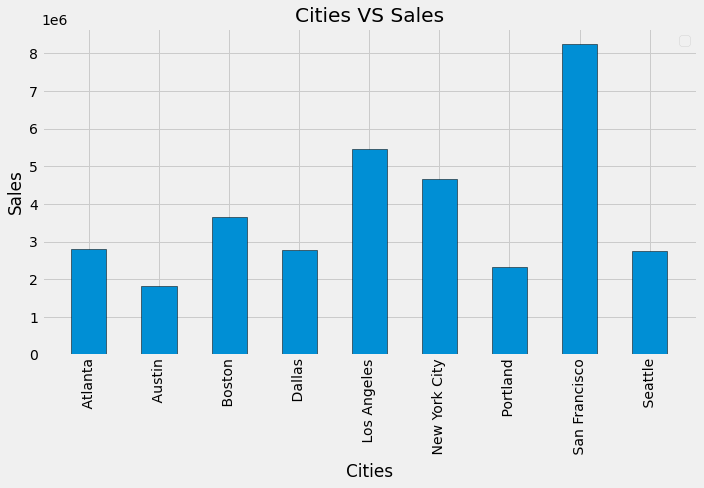

In [446]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,7))
plt.bar(list(city_data.index),city_data['Sales'],width = 0.5,ec='black')
plt.xticks(list(city_data.index),rotation = 'vertical')
plt.legend()
plt.xlabel('Cities')
plt.ylabel('Sales')
plt.title('Cities VS Sales')
plt.tight_layout()
plt.show()


In [281]:
city_data[city_data['Quantity Ordered'] == city_data['Quantity Ordered'].max()]


,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco,50239,8211461.74,315520,8262203.91


In [282]:
city_data[city_data['Sales'] == city_data['Sales'].max()]

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco,50239,8211461.74,315520,8262203.91


What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [285]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin


In [286]:
df['Hour'] = df['Order Date'].dt.hour

In [287]:
df['Minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin,11,59


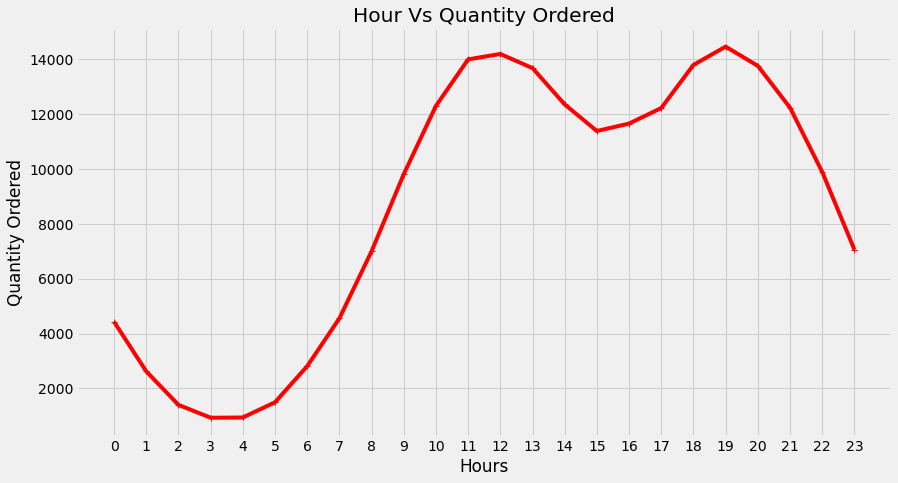

In [337]:
keys = range(0,24)
plt.figure(figsize=(13,7))
plt.style.use('fivethirtyeight')
plt.plot(keys,df.groupby('Hour')['Quantity Ordered'].sum(),'r+-')
plt.xlabel('Hours')
plt.ylabel('Quantity Ordered')
plt.title('Hour Vs Quantity Ordered')
plt.xticks(ticks=keys,labels=range(0,24))
plt.show()

#The best time to advertise the products are around 11 am and 7 pm.

In [344]:
duplicates = df[df['Order ID'].duplicated(keep=False)]
duplicates

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin,16,6
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin,16,6
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles,8,25
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles,8,25
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City,11,19
...,...,...,...,...,...,...,...,...,...,...,...
186761,319584,Wired Headphones,1,11.99,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035",12,11.99,Portland,0,30
186773,319596,iPhone,1,700.00,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",12,700.00,New York City,8,44
186774,319596,Lightning Charging Cable,1,14.95,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",12,14.95,New York City,8,44
186809,319631,34in Ultrawide Monitor,1,379.99,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301",12,379.99,Austin,22,35


In [353]:
duplicates['Grouped'] = duplicates.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
duplicates = duplicates[['Order ID','Grouped']].drop_duplicates()

KeyError: 'Column not found: Product'

In [356]:
duplicates.head()


,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


In [357]:
from itertools import combinations
from collections import Counter

In [358]:
count = Counter()
for row in duplicates['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [367]:
most_common = count.most_common(10)
items = []
sold = []
for item in most_common:
    items.append(item[0])
    sold.append(item[1])

In [370]:
list(items)

[('iPhone', 'Lightning Charging Cable'),
 ('Google Phone', 'USB-C Charging Cable'),
 ('iPhone', 'Wired Headphones'),
 ('Google Phone', 'Wired Headphones'),
 ('Vareebadd Phone', 'USB-C Charging Cable'),
 ('iPhone', 'Apple Airpods Headphones'),
 ('Google Phone', 'Bose SoundSport Headphones'),
 ('USB-C Charging Cable', 'Wired Headphones'),
 ('Vareebadd Phone', 'Wired Headphones'),
 ('Lightning Charging Cable', 'Wired Headphones')]

In [369]:
sold

[1005, 987, 447, 414, 361, 360, 220, 160, 143, 92]

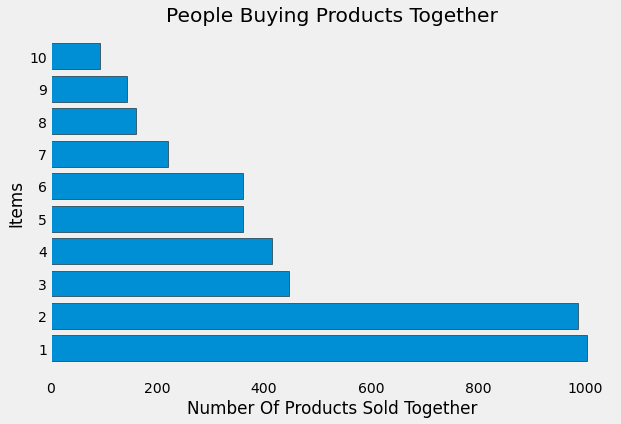

In [391]:
x_axis = np.arange(1,11)
plt.figure(figsize=(9,6))
plt.barh(x_axis,sold,ec = 'black')
plt.yticks(range(1,11))
plt.xlabel('Number Of Products Sold Together')
plt.ylabel('Items')
plt.title('People Buying Products Together')
plt.grid(False)
plt.show()

In [398]:
items_sales = pd.DataFrame(list(most_common),columns = ['Items','Sold Together Count'],index = range(1,11))

In [399]:
items_sales

,Items,Sold Together Count
1,"(iPhone, Lightning Charging Cable)",1005
2,"(Google Phone, USB-C Charging Cable)",987
3,"(iPhone, Wired Headphones)",447
4,"(Google Phone, Wired Headphones)",414
5,"(Vareebadd Phone, USB-C Charging Cable)",361
6,"(iPhone, Apple Airpods Headphones)",360
7,"(Google Phone, Bose SoundSport Headphones)",220
8,"(USB-C Charging Cable, Wired Headphones)",160
9,"(Vareebadd Phone, Wired Headphones)",143
10,"(Lightning Charging Cable, Wired Headphones)",92


What products sold the most!

In [420]:
product_grouped = df.groupby('Product')
quantity_sold = product_grouped['Quantity Ordered'].sum()

In [422]:
product = [product for product,df in product_grouped]

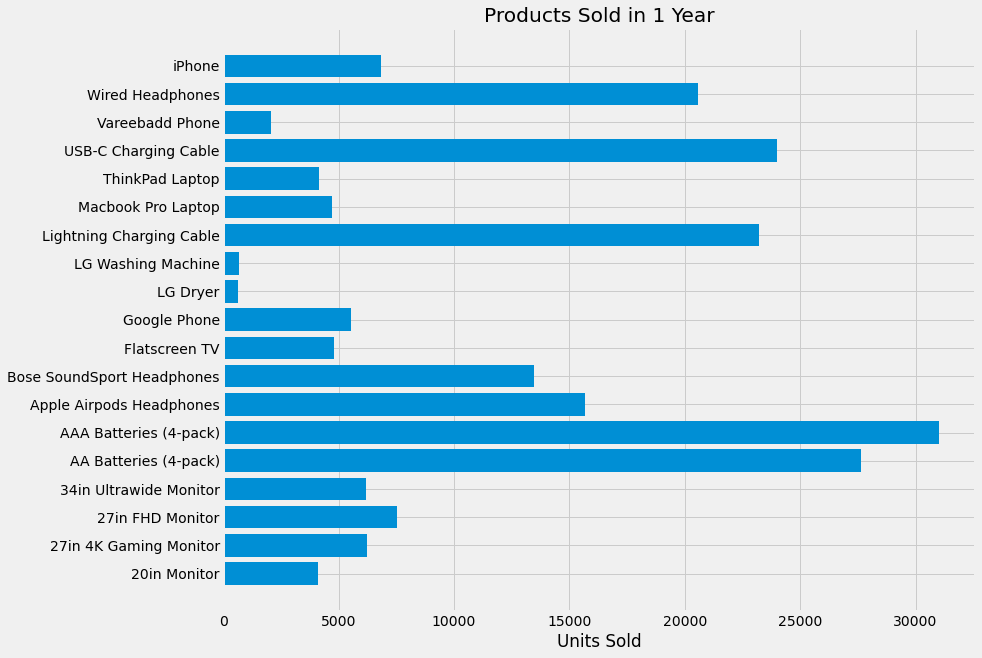

In [423]:
plt.figure(figsize=(12,10))
plt.barh(product,quantity_sold)
plt.xlabel('Units Sold')
plt.title('Products Sold in 1 Year')
plt.show()

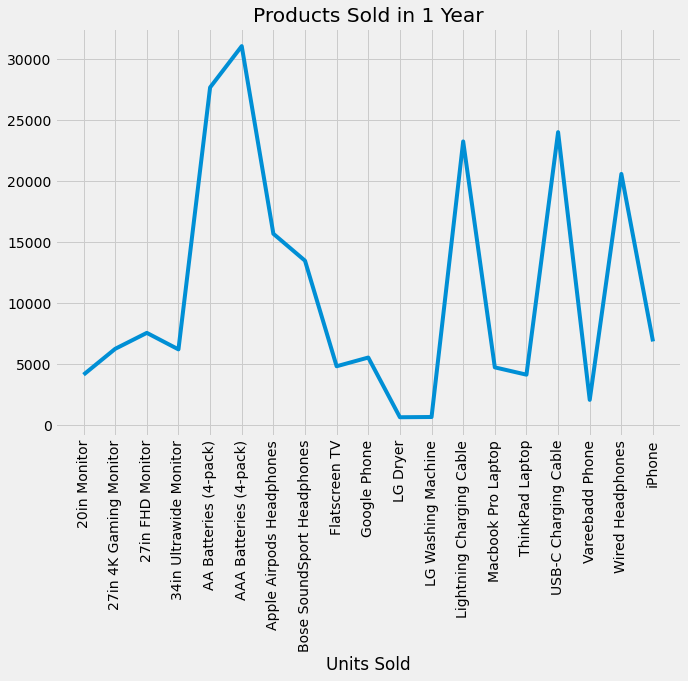

In [440]:
plt.figure(figsize=(10,7))
plt.plot(product,quantity_sold)
plt.xlabel('Units Sold')
plt.title('Products Sold in 1 Year')
plt.xticks(product,rotation='vertical')
plt.show()

C:\Users\mhdfz\AppData\Local\Temp/ipykernel_102868/2555457047.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product, rotation='vertical', size=8)
C:\Users\mhdfz\AppData\Local\Temp/ipykernel_102868/2555457047.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


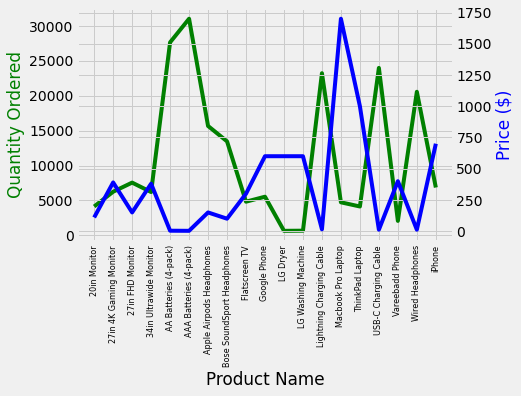

In [439]:
prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(product, quantity_sold, color='g')
ax2.plot(product, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(product, rotation='vertical', size=8)
fig.show()